In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib as mpl

In [2]:
params = {
    'patch.linewidth':5,
    'patch.edgecolor':'black',
    'legend.fontsize': 40,
    'legend.title_fontsize': 40,
    'legend.handlelength': 2,
    'grid.color':'black',
    'figure.figsize':(45,45),
    'xtick.labelsize':40,
    'ytick.labelsize':40,
    'legend.fontsize':40,
    'axes.labelsize':45,
    'axes.labelweight':'bold',
    'lines.linewidth':10,
}

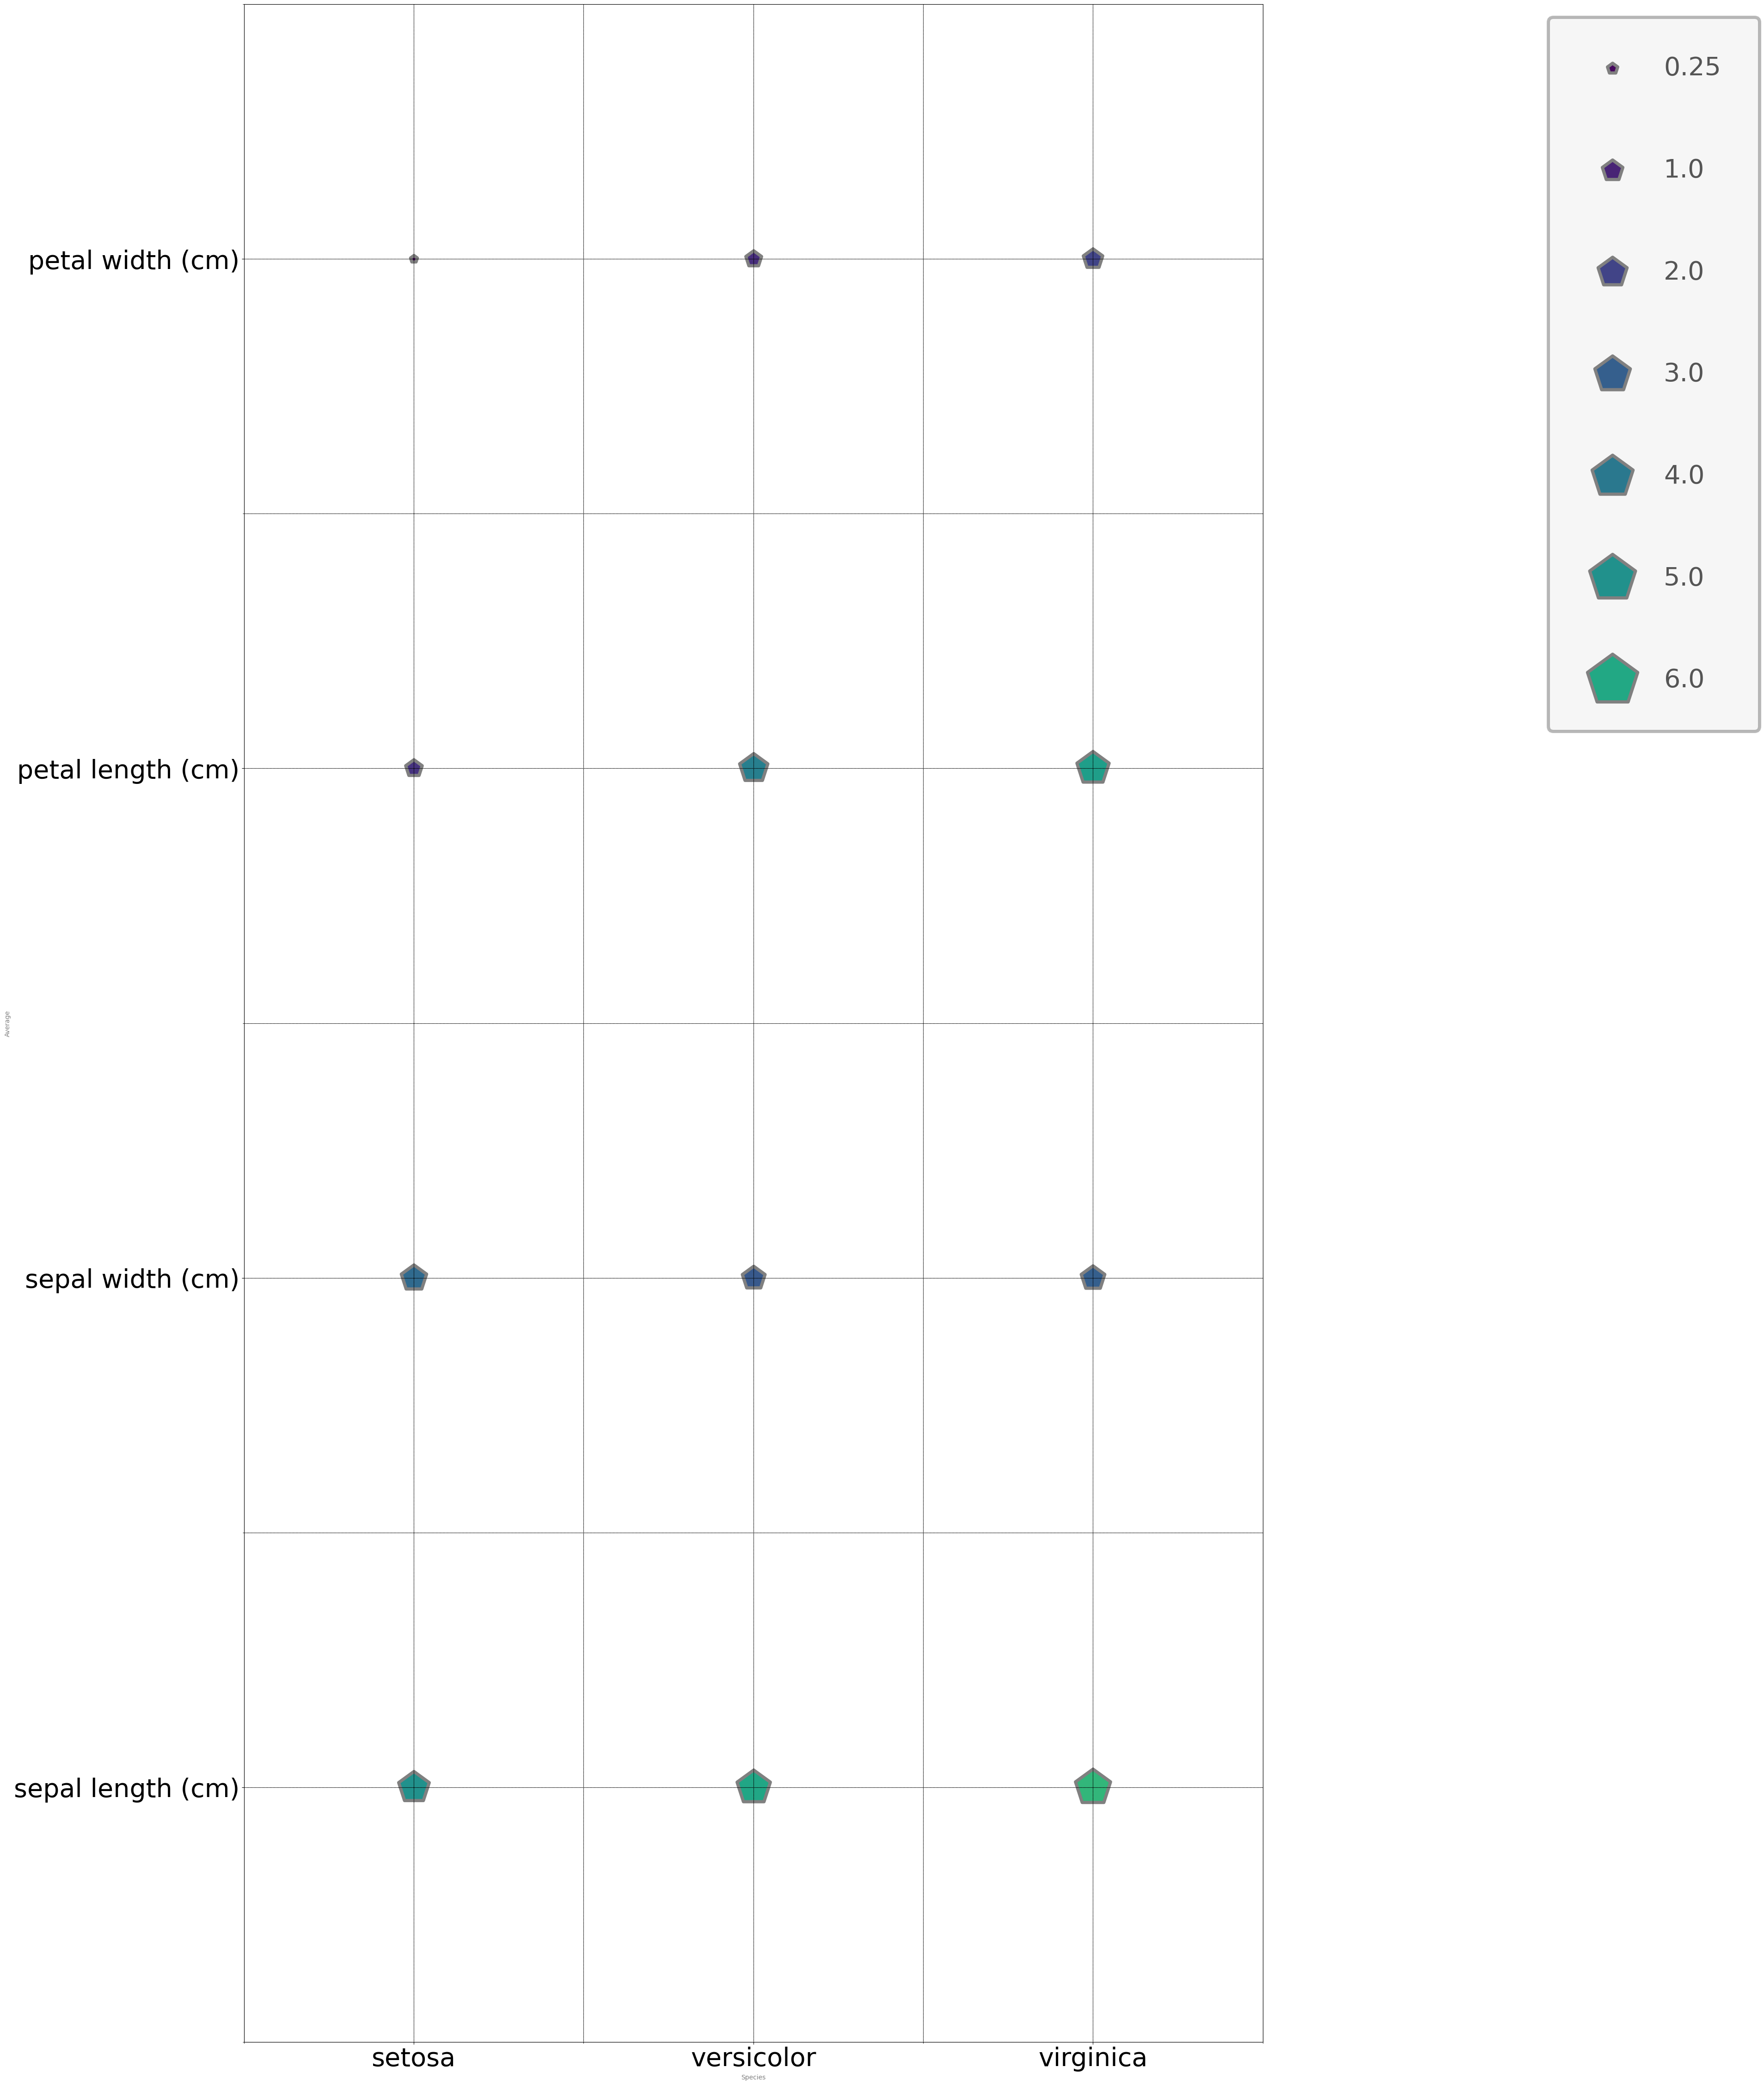

In [3]:
#colormap
cmap = mpl.colormaps.get_cmap('viridis')
#color normalization between min and max values
norm = colors.Normalize(vmin=0, vmax=10)
#scale factor for bubbles
max_value=500

plt.rcParams.update(params)
iris=datasets.load_iris()
X=iris.data
Y=iris.target
xlabels=iris.target_names
ylabels=iris.feature_names
M=len(xlabels)
N=len(ylabels)
Average=np.zeros((X.shape[1],M))
fig,ax=plt.subplots(1, 1)

for i in np.unique(Y):
    for j in range(0,X.shape[1]):
        Average[j][i]=np.mean(X[Y==i,j])
        x = [i]
        y = [j]
        color=cmap(norm(Average[j][i]))
        p=ax.scatter(x,y,s=max_value*Average[j][i],c=[color],label=Average[j][i])

legend_values=np.array([0.25,1,2,3,4,5,6])
patches=[]
for i in legend_values:
    color=cmap(norm(i))
    p=ax.scatter([0],[0],s=max_value*i,c=[color],label=i)
    patches.append(p)

handles,labels=ax.get_legend_handles_labels()
labels_float=np.array([float(i) for i in labels])
legend_order=[]
for i in legend_values:
    ind=np.where(labels_float==i)
    legend_order.append(ind[0][0])
ax.legend([handles[idx] for idx in legend_order],[labels[idx] for idx in legend_order],bbox_to_anchor=(1.5, 1),labelspacing=3,borderpad=1.5,handletextpad=1)

for i in patches:
    i.set(visible=False)

ax.set(xticks=np.arange(M), yticks=np.arange(N),xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xlabel('Species')
ax.set_ylabel('Average')
ax.grid(which='minor')
ax.set_aspect(1.5)
plt.show()